# Clustering Notebook

In [101]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_context("notebook")

import sklearn.cluster as sk_clus
from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist



## Make Blobs of Data

In [109]:
data, y = make_blobs(n_samples=2000, n_features=3, centers=5, cluster_std=1.1)

In [110]:
df = pd.DataFrame( {'f1': data.T[0], 'f2': data.T[1], 'f3': data.T[2]})
display(df.shape)
df.head()

(2000, 3)

,f1,f2,f3
0,-3.116762,-0.043808,-3.935945
1,-1.712410,1.916180,4.157723
2,-3.186619,2.610048,-5.580462
3,4.753687,9.740891,1.492948
4,1.601209,8.644957,3.687337


## K-Means

### K-Means: Fit + Tune

In [111]:
distortions = []
for k in range(1, 20):

    kmeans = sk_clus.KMeans(n_clusters=k, random_state=0).fit(df.values)
    distortions.append(sum(np.min(cdist(df.values, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])
# kmeans.labels_

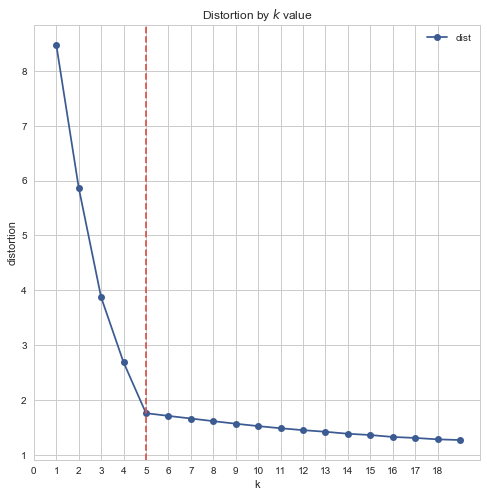

In [114]:
results = pd.DataFrame({'k': list(range(1, 20)), 'dist':distortions})

# results = results.set_index('k')
ax = results.plot(kind='line', x='k', y='dist', marker='o', markerfacecolor=sns.xkcd_rgb["denim blue"], color=sns.xkcd_rgb["denim blue"])
ax.set_xlabel('k')
ax.set_ylabel('distortion')
ax.set_xticks(list(results.index))
ax.set_title("Distortion by $k$ value ")
ax.axvline(5, color=sns.xkcd_rgb["pale red"], linestyle='--')
plt.gcf().set_size_inches(8, 8)

## K-Means: Re-train based on tuning

In [151]:
df = df[['f1', 'f2', 'f3']]
df.head()

,f1,f2,f3
0,-3.116762,-0.043808,-3.935945
1,-1.712410,1.916180,4.157723
2,-3.186619,2.610048,-5.580462
3,4.753687,9.740891,1.492948
4,1.601209,8.644957,3.687337


In [152]:
kmeans = sk_clus.KMeans(n_clusters=5, random_state=0).fit(df[['f1', 'f2', 'f3']].values)
df['cluster'] = kmeans.labels_

In [153]:
cc = pd.DataFrame({'x':kmeans.cluster_centers_.T[0], 
                   'y':kmeans.cluster_centers_.T[1], 
                   'z':kmeans.cluster_centers_.T[2]})


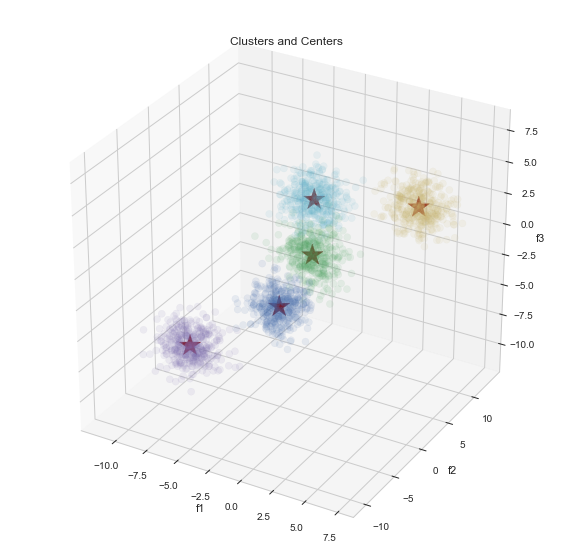

In [154]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot cluster centers
x = np.array(cc['x'])
y = np.array(cc['y'])
z = np.array(cc['z'])
ax.scatter(x,y,z, marker="*", c=sns.xkcd_rgb['dark red'], s=500, alpha=1.0)

# plot points
x = np.array(df['f1'])
y = np.array(df['f2'])
z = np.array(df['f3'])
my_cmap = ListedColormap(sns.color_palette().as_hex())
ax.scatter(x,y,z, marker="o", c=df["cluster"], s=50, cmap=my_cmap, alpha=0.1)


ax.set_xlabel('f1')
ax.set_ylabel('f2')
ax.set_zlabel('f3')
ax.set_title("Clusters and Centers")

plt.gcf().set_size_inches(10, 10)

plt.show()

## Hierarchical Clustering

In [283]:
cust_data = pd.read_csv('./clustering/shopping_data.csv')
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [284]:
cust_data["Genre"] = cust_data["Genre"].astype('category')
cust_data["Genre_Cat"] = cust_data["Genre"].cat.codes
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


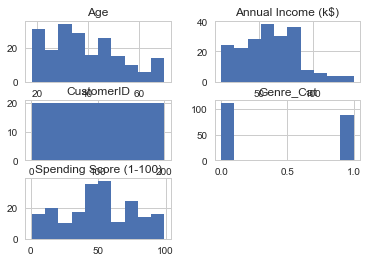

In [285]:
axes = cust_data.hist()

In [286]:
data = cust_data.iloc[:,2:].values
cust_data.iloc[:,2:].head()





,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


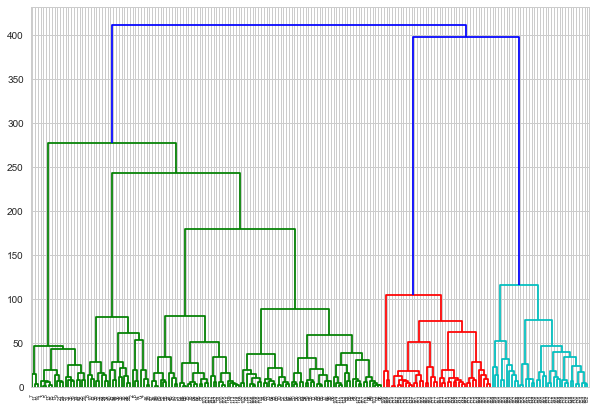

In [287]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
# plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  


In [288]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
clusters = cluster.fit_predict(data)  


In [289]:
cust_data['clusters'] = clusters

In [290]:
cust_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat,clusters
0,1,Male,19,15,39,1,4
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4


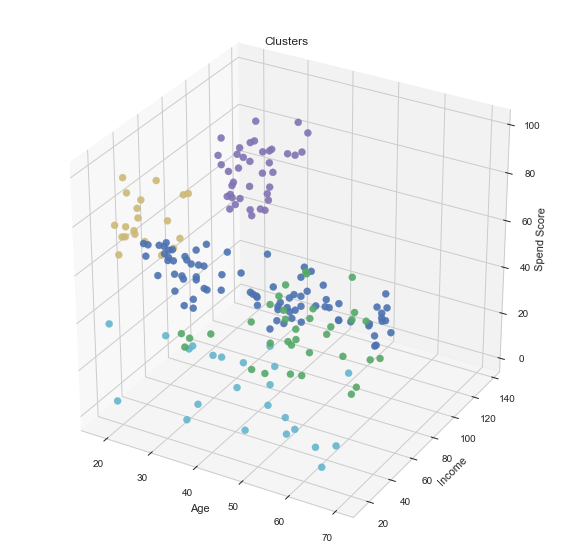

In [291]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot points
x = np.array(cust_data['Age'])
y = np.array(cust_data['Annual Income (k$)'])
z = np.array(cust_data['Spending Score (1-100)'])
my_cmap = ListedColormap(sns.color_palette().as_hex())
ax.scatter(x,y,z, marker="o", c=cust_data["clusters"], s=50, cmap=my_cmap, alpha=0.9)


ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spend Score')
ax.set_title("Clusters")

plt.gcf().set_size_inches(10, 10)

plt.show()

In [265]:
cust_data['marker'] = cust_data.apply(lambda row: '^' if row['Genre_Cat'] == 1 else 'v', axis=1)

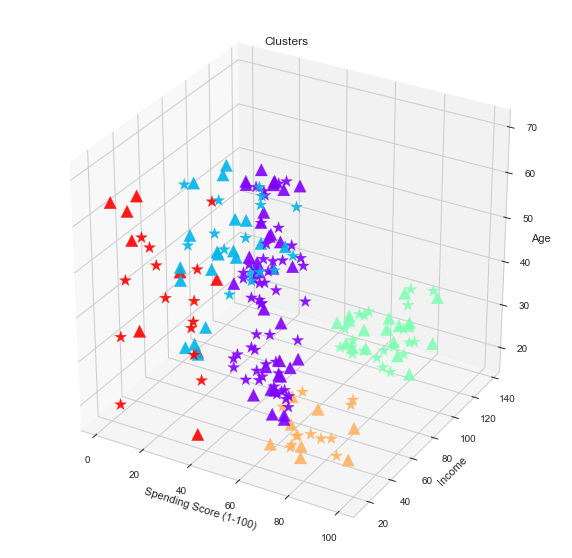

In [292]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for gender in cust_data['Genre'].unique():
    marker = '^' if gender == 'Male' else '*'
    mask = cust_data['Genre']==gender
    temp_data = cust_data[mask]
    x = np.array(temp_data['Spending Score (1-100)'])
    y = np.array(temp_data['Annual Income (k$)'])
    z = np.array(temp_data['Age'])
    c = np.array(temp_data["clusters"])
    my_cmap = ListedColormap(sns.color_palette().as_hex())

    ax.scatter(x,y,z, s=150, marker=marker, c=c, cmap='rainbow', alpha=0.9)
ax.set_xlabel('Spending Score (1-100)')
ax.set_ylabel('Income')
ax.set_zlabel('Age')
ax.set_title("Clusters")

plt.gcf().set_size_inches(10, 10)

plt.show()

In [293]:
import plotly.offline as po
import plotly.graph_objs as go




In [294]:
po.init_notebook_mode(connected=True)

In [300]:
temp_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Genre_Cat,clusters
2,3,Female,20,16,6,0,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,0,4
5,6,Female,22,17,76,0,3
6,7,Female,35,18,6,0,4


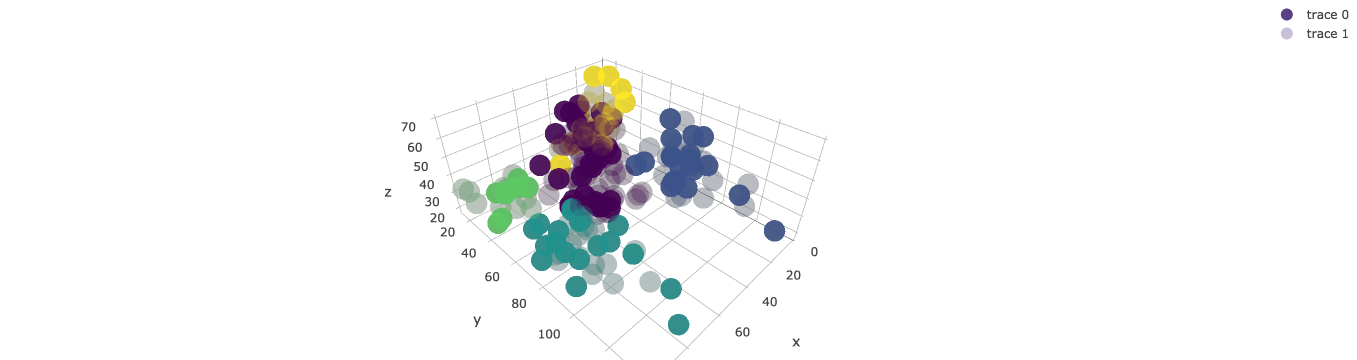

In [307]:
traces = []
for gender in cust_data['Genre'].unique():
    marker = '^' if gender == 'Male' else '*'
    opacity = 0.9 if gender == 'Male' else 0.3
    mask = cust_data['Genre']==gender
    temp_data = cust_data[mask]
    x = temp_data['Spending Score (1-100)']
    y = temp_data['Annual Income (k$)']
    z = temp_data['Age']
    c = temp_data["clusters"]
    trace = go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=12, color=c, colorscale='Viridis', opacity=opacity))
    traces.append(trace)
layout = go.Layout(margin=dict( l=0,r=0,b=0,t=0), xaxis={'title': 'Spend Score'}, yaxis={'title': 'Income'})
fig = go.Figure(data=traces, layout=layout)
po.iplot(fig, filename='3d-scatter-colorscale')
  
#     my_cmap = ListedColormap(sns.color_palette().as_hex())

#     ax.scatter(x,y,z, s=150, marker=marker, c=c, cmap='rainbow', alpha=0.9)
